In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:3]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


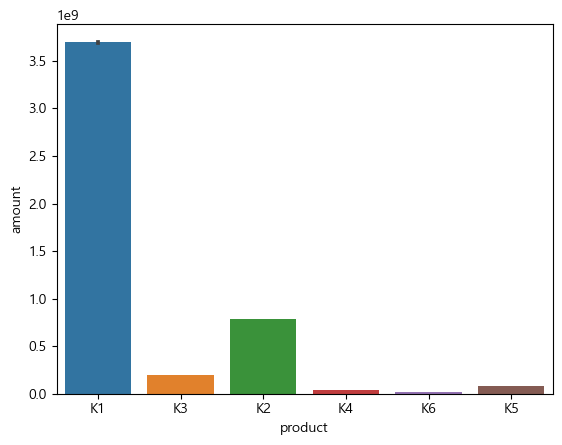

In [23]:
sns.barplot(data=df_TOCC, x='product', y='amount', estimator=sum)
plt.show() 

In [24]:
df_TOCC['amount'].describe()

count     51304.000000
mean      93994.980021
std       15305.147334
min       54603.000000
25%       81900.000000
50%       96900.000000
75%       98400.000000
max      215700.000000
Name: amount, dtype: float64

#### pivot table_product별 amount 총 합을 확인
    - top 3
    

In [32]:
df_TOCC_sum = pd.pivot_table(data=df_TOCC, index='product', values='amount', aggfunc=sum)
df_TOCC_sum.sort_values(by='amount', ascending=False).iloc[3:]

,amount
product,
K5,77236500
K4,42328500
K6,22734000


In [26]:
df_TOCC_sum = pd.pivot_table(data=df_TOCC, index='product', values='amount', aggfunc=sum)
df_TOCC_pro_list=df_TOCC_sum.sort_values(by='amount', ascending=False).iloc[3:].index.to_list()
df_TOCC_pro_list

['K5', 'K4', 'K6']

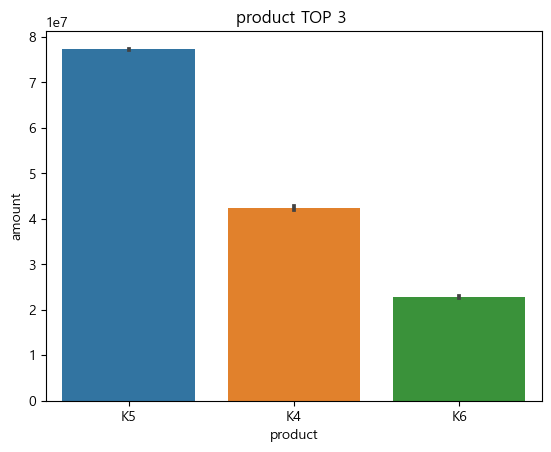

In [27]:
sns.barplot(data=df_TOCC, x='product', y='amount', estimator=sum, order=df_TOCC_pro_list)
plt.title('product TOP 3 ')
plt.show() 

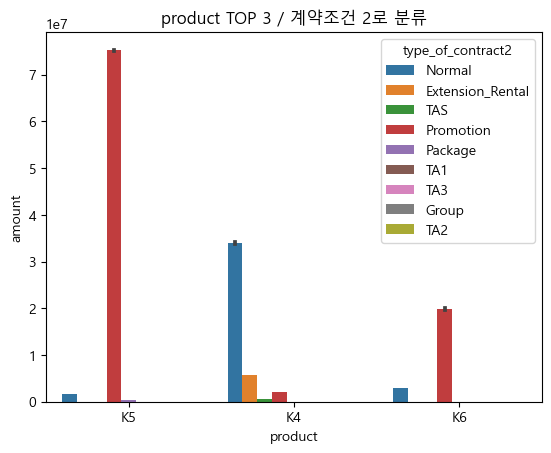

In [29]:
sns.barplot(data=df_TOCC, x='product', y='amount', estimator=sum, order=df_TOCC_pro_list, hue='type_of_contract2')
plt.title('product TOP 3 / 계약조건 2로 분류')
plt.show() 

K5 는 promotion으로 계약 된것이 가장 많음. 
K4 는 일반 계약이 가장 많고 렌탈 연장 계약이 2순위인듯
K6 도 K5와 같이 promotion 계약이 많은데 K5보다는 promotion조건이 좋은것 같진 않음. 

분류 잘못함. _수정하기